# 1. Install and Import Dependencies

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


In [2]:
import tensorflow as tf

# Get the list of available physical GPU devices
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    # Assuming there's at least one GPU, you can print the cuDNN version
    print("cuDNN version:", gpus[0].device_cudnn_version)
else:
    print("No GPU devices found. Make sure you have a compatible GPU and the required drivers installed.")


No GPU devices found. Make sure you have a compatible GPU and the required drivers installed.


In [39]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [5]:
!cd yolov5 & pip install -r requirements.txt

  Using cached GitPython-3.1.40-py3-none-any.whl.metadata (12 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached torchvision-0.16.0-cp311-cp311-win_amd64.whl.metadata (6.6 kB)
  Using cached ultralytics-8.0.200-py3-none-any.whl.metadata (31 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl.metadata (1.2 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)
  Using cached smmap-5.0.1-py3-none-any.whl.metadata (4.3 kB)
Using cached GitPython-3.1.40-py3-none-any.whl (190 kB)
Using cached torchvision-0.16.0-cp311-cp311-win_amd64.whl (1.3 MB)
Using cached ultralytics-8.0.200-py3-none-any.whl (644 kB)
Using cached gitdb-4.0.11-py3-none-any.whl (62 kB)
Using cached smmap-5.0.1-py3-none-any.whl (24 kB)


In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
if torch.cuda.is_available():
    print("GPU is available")
else:
    print("No GPU available")

GPU is available


# 2. Load Model

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')


Using cache found in C:\Users\gokul/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-10-24 Python-3.8.0 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [9]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [10]:
results = model(img)
results.print()

image 1/1: 533x800 2 persons, 28 cars, 5 trucks
Speed: 553.5ms pre-process, 154.8ms inference, 26.4ms NMS per image at shape (1, 3, 448, 640)


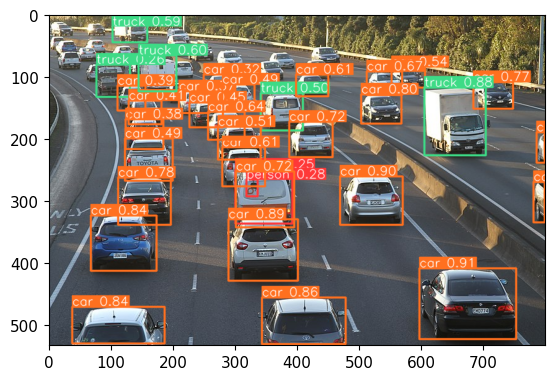

In [11]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [12]:
results.render()

[array([[[251, 216, 174],
         [254, 220, 175],
         [246, 213, 168],
         ...,
         [127, 149, 146],
         [ 67,  79,  55],
         [ 64,  70,  34]],
 
        [[235, 201, 156],
         [233, 200, 155],
         [221, 189, 142],
         ...,
         [120, 142, 140],
         [ 82,  92,  67],
         [ 46,  52,  16]],
 
        [[252, 220, 171],
         [245, 213, 164],
         [212, 180, 131],
         ...,
         [135, 155, 154],
         [ 66,  74,  50],
         [ 58,  62,  25]],
 
        ...,
 
        [[ 61,  69,  80],
         [ 64,  72,  83],
         [ 61,  69,  80],
         ...,
         [ 47,  52,  56],
         [ 48,  53,  57],
         [ 49,  54,  58]],
 
        [[ 56,  64,  75],
         [ 72,  80,  91],
         [ 70,  78,  89],
         ...,
         [ 48,  53,  57],
         [ 48,  53,  57],
         [ 50,  55,  59]],
 
        [[ 64,  72,  83],
         [ 76,  84,  95],
         [ 63,  71,  82],
         ...,
         [ 49,  54,  58],
  

# 4. Real Time Detections

In [13]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

# 5. Train from scratch

In [2]:
import uuid   # Unique identifier
import os
import time

In [15]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 5

In [17]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

In [ ]:
!git clone https://github.com/tzutalin/labelImg

In [3]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

  Using cached PyQt5-5.15.10-cp37-abi3-win_amd64.whl.metadata (2.2 kB)
  Using cached PyQt5_sip-12.13.0-cp311-cp311-win_amd64.whl.metadata (524 bytes)
     ---------------------------------------- 0.0/50.1 MB ? eta -:--:--
      --------------------------------------- 0.8/50.1 MB 24.8 MB/s eta 0:00:02
     - -------------------------------------- 2.1/50.1 MB 26.8 MB/s eta 0:00:02
     --- ------------------------------------ 3.8/50.1 MB 27.4 MB/s eta 0:00:02
     ---- ----------------------------------- 6.1/50.1 MB 32.3 MB/s eta 0:00:02
     ------ --------------------------------- 7.9/50.1 MB 36.2 MB/s eta 0:00:02
     -------- ------------------------------ 10.8/50.1 MB 43.7 MB/s eta 0:00:01
     ---------- ---------------------------- 13.8/50.1 MB 59.5 MB/s eta 0:00:01
     ------------- ------------------------- 17.2/50.1 MB 59.5 MB/s eta 0:00:01
     ---------------- ---------------------- 20.7/50.1 MB 65.2 MB/s eta 0:00:01
     ------------------ -------------------- 23.5/50.1 MB

The system cannot find the path specified.


In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2
  

# 6. Load Custom Model

In [7]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path=r"C:\Users\gokul\Downloads\yolov5\runs\train\exp12\weights\last.pt", force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\gokul/.cache\torch\hub\master.zip
YOLOv5  2023-10-24 Python-3.8.0 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [10]:
import os
img = os.path.join('data', 'images', r"C:\Users\gokul\OneDrive\Pictures\Camera Roll\WIN_20231024_16_47_52_Pro.jpg")

In [11]:
results = model(img)

In [12]:
results.print()

image 1/1: 720x1280 1 wakDown
Speed: 48.7ms pre-process, 172.9ms inference, 2.2ms NMS per image at shape (1, 3, 384, 640)


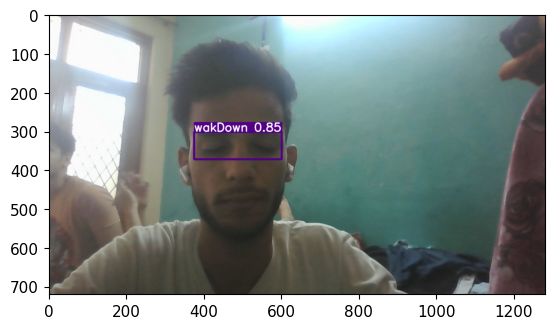

In [13]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [10]:
pip install pygame

   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.4/10.8 MB 45.3 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/10.8 MB 53.6 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/10.8 MB 53.6 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/10.8 MB 53.6 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/10.8 MB 53.6 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/10.8 MB 53.6 MB/s eta 0:00:01
   ---------------- ----------------------- 4.5/10.8 MB 13.5 MB/s eta 0:00:01
   -------------------------- ------------- 7.0/10.8 MB 18.7 MB/s eta 0:00:01
   ---------------------------------- ----- 9.2/10.8 MB 21.7 MB/s eta 0:00:01
   ---------------------------------------  10.8/10.8 MB 23.4 MB/s eta 0:00:01
   ---------------------------------------- 10.8/10.8 MB 21.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
from pygame import mixer
import numpy as np
import cv2

In [2]:
from pygame import mixer
import cv2
import numpy as np

sound= mixer.Sound(r"C:\Users\gokul\objectDetection\mrlEyes_2018_01\alarm (1).wav")


    # Initialize the mixer
mixer.init()


    # Initialize the score variable
global score
score = 0

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()

        # Make detections
    results = model(frame)

    
    height, width = frame.shape[0:2]  # Extract height and width

    class_id = 1
        
    if class_id in results.pred[0][:, 5]:
            # Increment the score variable
        score += 1
        if score > 15:
            try:
                sound.play()
            except:
                pass

    else:
        print((results.pred[0][:, 5]))
        score -= 1
        if score<0:
            score  = 0
                

            # Display the score on the frame
    cv2.putText(frame, 'Score: ' + str(score), (100, height - 20),
                    fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL,
                    fontScale=1, color=(255, 255, 255),
                    thickness=1, lineType=cv2.LINE_AA)
        
    rendered = np.squeeze(results.render())
    frame[0:rendered.shape[0], 0:rendered.shape[1]] = rendered

    cv2.imshow('YOLO', frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
       break



cap.release()
cv2.destroyAllWindows()


pygame 2.5.2 (SDL 2.28.3, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


error: mixer not initialized